# Matthew Kearney

#### Section 1 - Training Data Preparation

#### Libraries

In [191]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import kstest, norm


# Preprocessing:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Filter Method
# Wrapper method
# Forward feature selection, Backward feat selection
# 

# Settings: 
pd.set_option('display.max_columns', None)


#### Load the training data 

In [192]:
df =pd.read_csv('train_data.csv')
df.describe()

,Index,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5.807000e+03,5.807000e+03,5807.000000,5.807000e+03,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5.807000e+03,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5.807000e+03,5.807000e+03,5807.000000,5807.000000,5.807000e+03,5.807000e+03,5807.000000,5.807000e+03,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5807.000000,5.807000e+03,5807.000000,5.807000e+03,5807.000000,5807.000000,5807.000000,5807.000000,5.807000e+03,5.807000e+03,5807.000000,5807.000000,5807.000000,5.807000e+03,5807.000000,5807.000000,5807.000000,5.807000e+03,5807.000000,5807.000000,5807.000000,5.807000e+03,5.807000e+03,5807.000000,5.807000e+03,5807.000000,5.807000e+03,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5.807000e+03,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.0,5807.000000
mean,2903.000000,0.034097,0.505416,0.558893,0.553852,0.607958,0.607938,0.998726,0.797192,0.809081,0.303688,0.781369,1.997255e+09,1.983664e

In [193]:
df

,Index,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,0,0.450397,0.504034,0.506986,0.594640,0.594640,0.998906,0.797293,0.809239,0.303489,0.781491,8.010000e+09,0.000000e+00,0.462634,0.000414,0.000000,0.178754,0.178754,0.178754,0.204879,0.318455,0.029433,0.087615,0.160729,0.021975,0.847242,0.688371,0.688371,0.217462,6.720000e+09,0.000426,0.263436,0.377035,0.009750,0.005755,0.630234,0.005869,0.115609,0.884391,0.005180,0.372958,0.005920,0.087628,0.159716,0.398020,0.140930,0.002141,0.002954,1.383370e-04,1.626470e-04,0.032742,0.015463,0.389091,0.012669,0.778116,0.153375,0.259177,0.069738,0.005650,0.007310,0.050257,0.342193,0.277532,0.010938,0.403584,0.733788,0.328359,0.016590,0.927051,0.002077,0.017202,6.500000e+09,3.880000e+09,0.593935,5.450000e+09,0.671586,0.457497,0.403584,0.328359,0.117688,0.666103,0.464342,0.570385,0.318116,0.029919,0,0.780554,0.004919,0.623634,0.594641,0.838869,0.279036,0.026788,0.565144,1,0.032464
1,1,0,0.530005,0.572885,0.574763,0.605695,0.605558,0.999058,0.797512,0.809399,0.303553,0.781665,1.024540e-04,2.720000e+08,0.464667,0.000140,0.259439,0.200413,0.200413,0.200413,0.235606,0.324503,0.047159,0.116603,0.193116,0.022144,0.848121,0.689613,0.689613,0.217618,6.770000e+09,0.000504,0.264238,0.381348,0.011342,0.008709,0.630655,0.005875,0.115669,0.884331,0.005412,0.370861,0.009225,0.116583,0.191396,0.405506,0.161919,0.000566,0.011178,1.09867

In [194]:
# make a dict mapping for ease to access labels (features)
dict = {}
for i in enumerate(df.columns.tolist()):
    dict.update({i[1].strip():df.columns.tolist()[i[0]]})

#### Note that the data is unscaled. Min-max scaling (normalization) is employed below.

May only want to scale things that aren't on [0,1]

In [195]:
df_min_max_scaled = df.copy() 

columns_not_to_scale = ['Index', dict['Net Income Flag']]

in_scale = []
for column in df_min_max_scaled.columns:  # dont scale index...
    if column in columns_not_to_scale:
        df_min_max_scaled[column] = df_min_max_scaled[column]
    elif (df_min_max_scaled[column].min() >= 0 and df_min_max_scaled[column].max() <= 1.0):
        df_min_max_scaled[column] = df_min_max_scaled[column]
        in_scale.append(column)
    else: 
        df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())  

df_min_max_scaled.describe()
print(in_scale)
print(len(in_scale), "columns are already in normalized scale")

df = df_min_max_scaled
df



['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Cash flow rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Interest Expense Ratio', ' Debt ratio %', ' Net worth/Assets', ' L

,Index,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,0,0.450397,0.504034,0.506986,0.594640,0.594640,0.998906,0.797293,0.809239,0.303489,0.781491,8.018018e-01,0.000000e+00,0.462634,4.182232e-13,0.000000,0.178754,0.178754,0.178754,0.204879,0.318455,1.949184e-11,0.087615,0.160729,0.021975,0.847242,0.688371,0.688371,0.217462,6.726727e-01,4.571222e-14,0.263436,0.377035,3.545585e-12,6.235025e-13,0.630234,5.792605e-13,0.115609,0.884391,0.005180,0.372958,0.005920,0.087628,0.159716,0.398020,0.140930,2.197686e-13,3.035633e-13,1.384755e-14,1.628098e-14,0.032742,2.193401e-12,0.389091,1.323791e-12,0.778116,0.153375,0.259177,0.069738,6.269880e-13,7.575035e-13,0.050257,0.342193,0.277532,1.103752e-12,0.403584,0.733788,0.328359,1.739017e-12,0.927051,0.002077,0.017202,6.500000e-01,3.880000e-01,0.593935,5.450000e-01,0.671586,5.498760e-11,0.403584,0.328359,0.117688,0.666103,0.464342,0.570385,0.318116,0.029919,0,0.780554,4.906065e-13,0.623634,0.594641,0.838869,0.279036,0.026788,0.565144,1,0.032464
1,1,0,0.530005,0.572885,0.574763,0.605695,0.605558,0.999058,0.797512,0.809399,0.303553,0.781665,1.025566e-14,2.725451e-02,0.464667,1.414283e-13,0.259439,0.200413,0.200413,0.200413,0.235606,0.324503,3.123101e-11,0.116603,0.193116,0.022144,0.848121,0.689613,0.689613,0.217618,6.776777e-01,5.399561e-14,0.264238,0.381348,4.124225e-12,9.436009e-13,0.630655,5.798110e-13,0.115669,0.884331,

In [196]:
df.describe()

,Index,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5.807000e+03,5.807000e+03,5807.000000,5.807000e+03,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5.807000e+03,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5.807000e+03,5807.000000,5807.000000,5.807000e+03,5.807000e+03,5807.000000,5.807000e+03,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5.807000e+03,5.807000e+03,5.807000e+03,5.807000e+03,5807.000000,5.807000e+03,5807.000000,5.807000e+03,5807.000000,5807.000000,5807.000000,5807.000000,5.807000e+03,5.807000e+03,5807.000000,5807.000000,5807.000000,5.807000e+03,5807.000000,5807.000000,5807.000000,5.807000e+03,5807.000000,5807.000000,5807.000000,5.807000e+03,5.807000e+03,5807.000000,5.807000e+03,5807.000000,5.807000e+03,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5.807000e+03,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5807.0,5807.000000
mean,2903.000000,0.034097,0.505416,0.558893,0.553852,0.607958,0.607938,0.998726,0.797192,0.809081,0.303688,0.781369,1.999255e-01,1.987639e-

The data is now on a usable scale

#### Separate the data, make a label dictionary

In [197]:
X = df.iloc[:, 2:] # X is my raw data, must be reduced to less features through f. engr. and extraction. Scale the data before beginning

# m = number of rows
# n = number of columns
m, n = X.shape

y = df.iloc[:, 1:2] # my target data is ready as it is 

We can get an idea of the column data in "COLUMN_DATA.txt" and figure out that some of the columns may be very indicative of bankruptcy (or inersely of successful operations), and that some may not be useful at all (or very slightly) for our needs of determining bankruptcy. We must be careful as we turn our data from 95 dimensions to 50 dimensions, as many features may find use *upon* interaction with other features. We only seek to remove excess data, i.e. data that has proides no use to determining bankrupty, with feature engineering and extraction. At the same time, we will want to drop out number of features to a more desirable, realistic and less computationally expensive number of features for model training. 

Without more extensive domain knowledge of economics and having the knack for determining bankruptcy, we can try to bridge this gap using exploratory data analysis and preprocessing including feature extraction and engineering. We should get the best grasp for all the data as possible before moving forward with feature selection.

In [198]:
X_null= X.isnull().sum()

num_features_w_null = 95
null_feats = []
for i in enumerate(X_null):
    if i[1] == 0:
        num_features_w_null= num_features_w_null - 1
    else: 
        null_feats.append(df.columns.tolist()[i[0]])

num_features_w_null

0

In [199]:
X.isnull().sum()


 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 95, dtype: int64

None of our features have null data for any observations, though their may be presence of outliers in columns which may decrease model accuracy if left unchecked. We should check for presence of outliers and mitigate their weight onto our model to expect best generalization to the test set.

In [200]:
bankrupt = 0
for i in range(0, m):
    if y['Bankrupt?'][i] == 1:
        bankrupt = bankrupt + 1
print(bankrupt / m)
bankrupt


0.0340967797485793


198

There are a total of 198 companies or 3.41% of companies declaring bankruptcy in the training data. We should use feature engineering if a feature has linearity to 'Bankrupt?', it must be feature engineered. Only in the case that the column is non-linearly related to the target data, then we can keep the feature as it is. Feature extraction may be done if and only if it holds a strong correlation (+ or -) with other features (not with the target). We should also confirm the normal distribution for each feature.

#### Looking at the data

In [201]:
df

,Index,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,0,0.450397,0.504034,0.506986,0.594640,0.594640,0.998906,0.797293,0.809239,0.303489,0.781491,8.018018e-01,0.000000e+00,0.462634,4.182232e-13,0.000000,0.178754,0.178754,0.178754,0.204879,0.318455,1.949184e-11,0.087615,0.160729,0.021975,0.847242,0.688371,0.688371,0.217462,6.726727e-01,4.571222e-14,0.263436,0.377035,3.545585e-12,6.235025e-13,0.630234,5.792605e-13,0.115609,0.884391,0.005180,0.372958,0.005920,0.087628,0.159716,0.398020,0.140930,2.197686e-13,3.035633e-13,1.384755e-14,1.628098e-14,0.032742,2.193401e-12,0.389091,1.323791e-12,0.778116,0.153375,0.259177,0.069738,6.269880e-13,7.575035e-13,0.050257,0.342193,0.277532,1.103752e-12,0.403584,0.733788,0.328359,1.739017e-12,0.927051,0.002077,0.017202,6.500000e-01,3.880000e-01,0.593935,5.450000e-01,0.671586,5.498760e-11,0.403584,0.328359,0.117688,0.666103,0.464342,0.570385,0.318116,0.029919,0,0.780554,4.906065e-13,0.623634,0.594641,0.838869,0.279036,0.026788,0.565144,1,0.032464
1,1,0,0.530005,0.572885,0.574763,0.605695,0.605558,0.999058,0.797512,0.809399,0.303553,0.781665,1.025566e-14,2.725451e-02,0.464667,1.414283e-13,0.259439,0.200413,0.200413,0.200413,0.235606,0.324503,3.123101e-11,0.116603,0.193116,0.022144,0.848121,0.689613,0.689613,0.217618,6.776777e-01,5.399561e-14,0.264238,0.381348,4.124225e-12,9.436009e-13,0.630655,5.798110e-13,0.115669,0.884331,

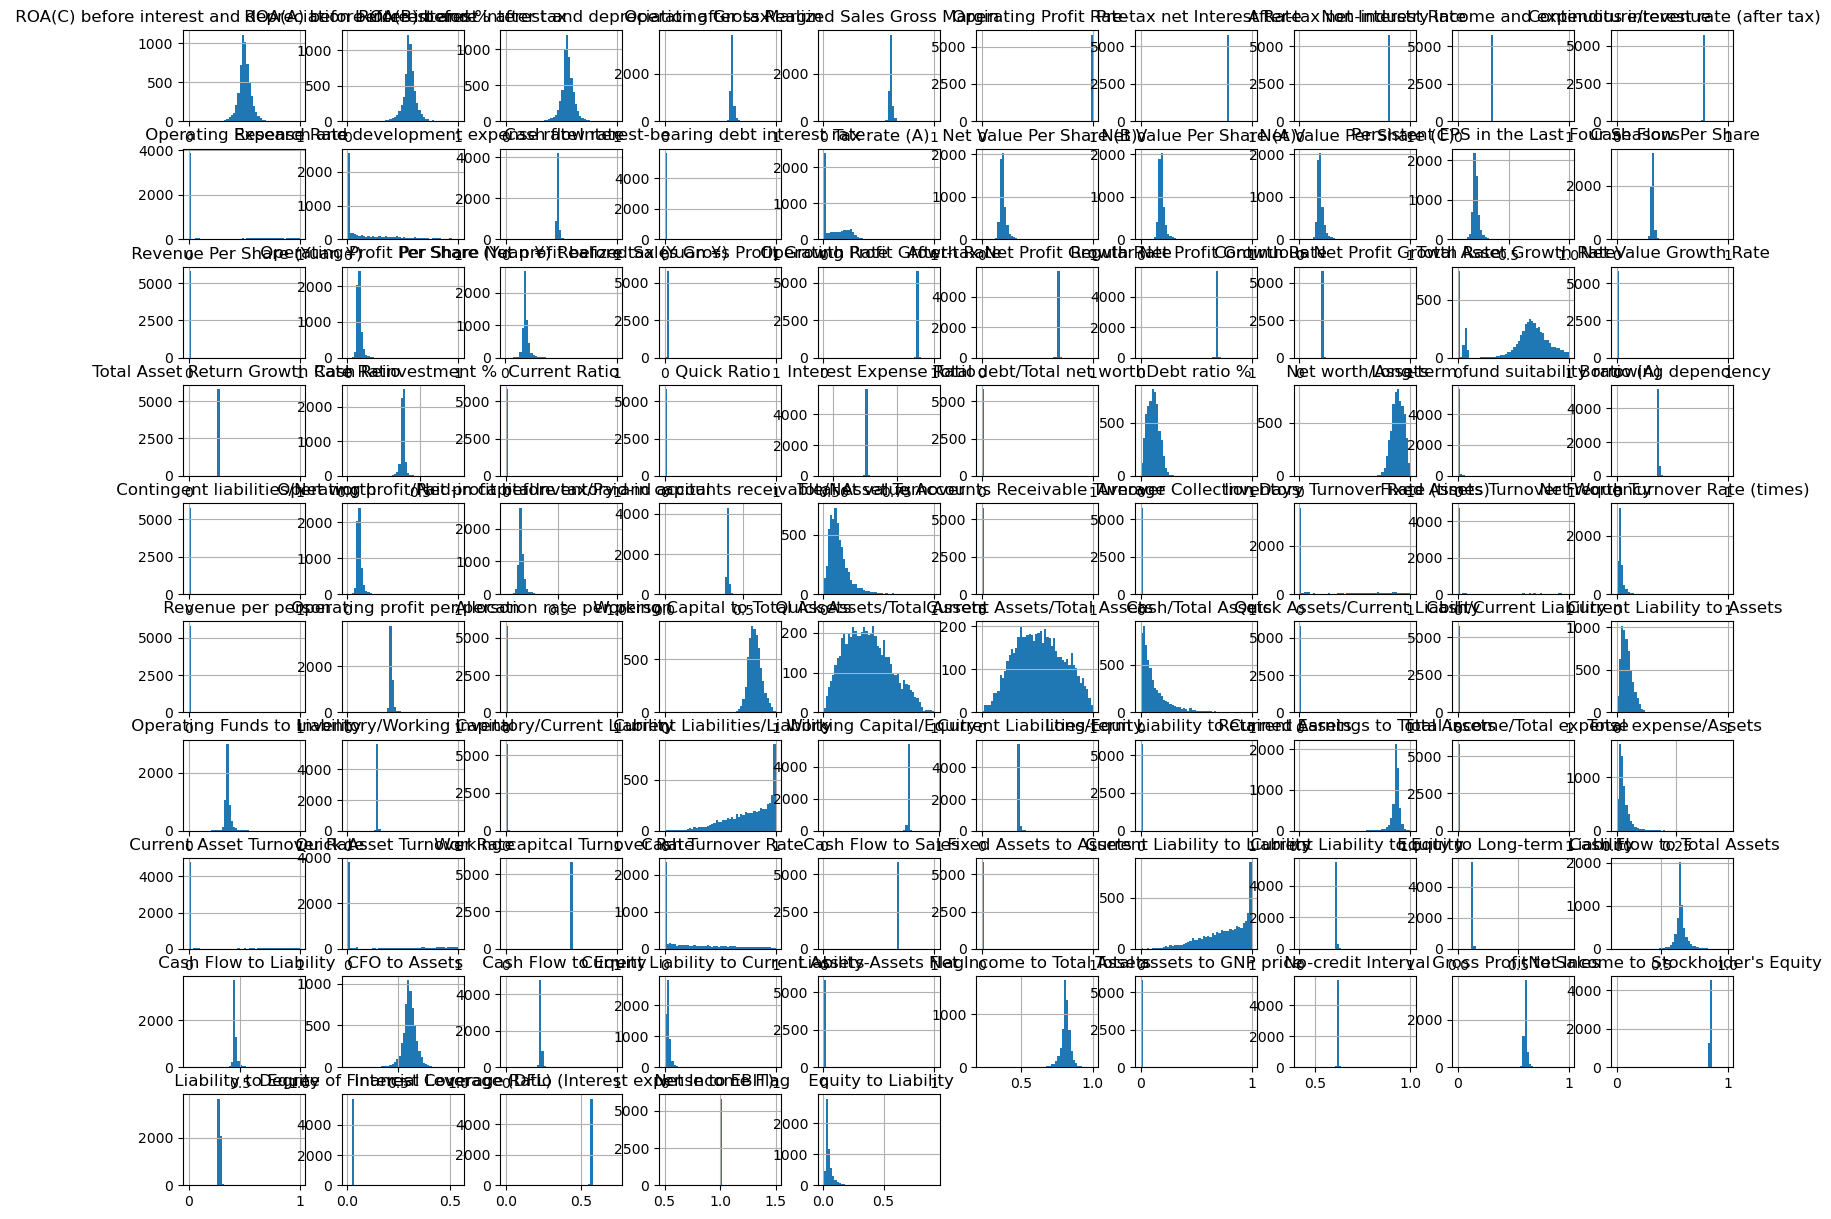

In [202]:
X.hist(bins=50, figsize=(20,15))
plt.show()

Some of these features show strong evidence of a gaussian distribution, but we can not rely on visualizations to determine linearity assumptions. Importantly, we can also see from many of these distributions, perhaps over half of them have completely vertical distribution (meaning that they all share the same value, there is no distribution). We should use further statistical methods, but these columns shouldn't be valuable to our predictions and accuracy.

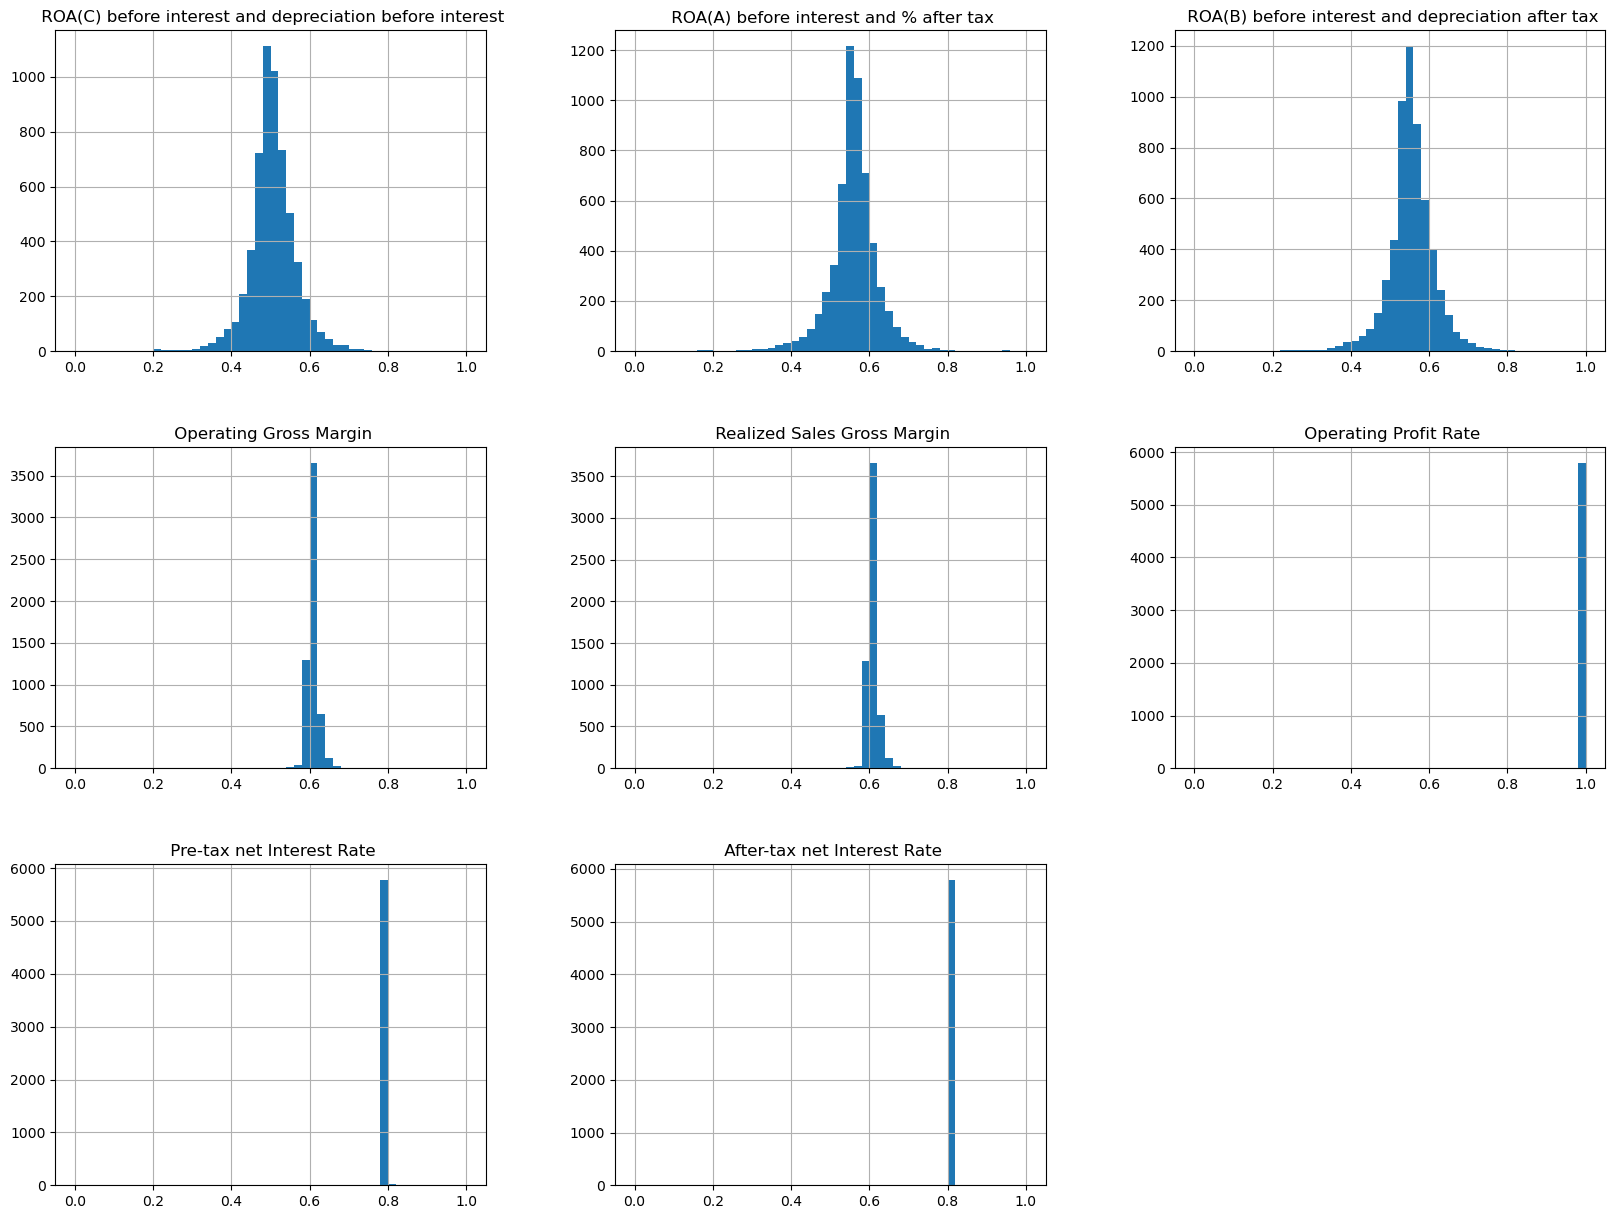

In [203]:
col = df.columns.tolist()[2:10]
X[col][:].hist(bins=50, figsize=(20,15))
plt.show()

Looking at some of the data more closely (it will be very difficult to see all data distributions visually), we can see how much of the data is related. For example, ROA(C), ROA(A), and ROA(B) all fit very similar Gaussian distributions with $\mu ~ \approx 0.5 - 0.55$. Also, operating gross margins and realized gross margins are *roughly* the same in their normal tendencies showing their mean distributions at $\mu ~ \approx 0.6$. We can even identify and make inferences on relations between 'pre-tax net interest rate' with $\mu$ just under 0.8 and 'after-tax net interest rate' where $\mu$ is just above 0.8. All companies have the same interest rates pre and post tax, so the question of whether these two columns are helpful in determining bankrupty arises, as there are no patterns or distinctions to draw from here. The 'pre-tax net interest rate' with $\mu$ just under 0.8 and 'after-tax net interest rate' data are not normally distibuted and are essentially discrete (and uniform/ duplicated) indicating these features may have no useful in our model. We should look at the bigger picture of the data to ensure our data assumes normalcy, at which point we can begin engineering and extraction. 

In [204]:
# df = df.drop(dict["Net Income Flag"], axis = 1)

In [205]:
column_labels= df.columns.tolist()
obj = open('COLUMN_NAMES.txt', 'w')


for i in enumerate(column_labels):
    obj.write(i[1].strip() + "\t\t\t" + str(df[i[1]].dtype) + "\n")
    column_labels[i[0]] = i[1].strip()

   
obj.close()

#### Testing uniqueness

In [206]:
val = df.nunique()

useless = []
for i in enumerate(val):
    # print(column_labels[i[0]], i[1])
    if i[1] == 1:
        useless.append(column_labels[i[0]])

Net income flag is definitely removable, we will not learn any information from this feature.

In [207]:
nonlinear_opts= ['kendall', 'spearman']
tc = nonlinear_opts[1]
corr_matrix_nonlinear = df[df.columns.tolist()].corr(tc) # opts: default, 'pearson' -> linear ;  'kendall', 'spearman' -> non-linear
corr_matrix_nonlinear.style.background_gradient(cmap='coolwarm')

c:\Users\mkear\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\mkear\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


We should use insights from the above correlation matrix to get insights for between-feature correlations to be permitted for feature extraction. 

In [208]:
nonlinear = corr_matrix_nonlinear['Bankrupt?']

The (linear) correlation of any feature to the target never exceeds 32% when using Pearson correlations, which is considered a moderate linear relationship. We should see further if any features are linearly related to the target. 

# Part 1

#### Training data requirements

1. PCA is not allowed to reduce the original dimensions. It can be used only after features are modified
 via extraction or engineering. More than 95% of information must be kept when PCA is performed.
 PCA can be a good strategy at the last stage of training the data, and it is optional.
 
2. An original feature can be kept if and only if non-linearity is confirmed. Otherwise, it must be
 feature engineered. Q: at what (correlation) value should we make this cutoff? <br>
 non-linearity -> (0,0.3)
 linearity -> 0.3+ or 0.8+
    We will want to play with these numbers

3. A feature can be extracted if and only if it holds a strong positive or negative correlation between
 other features (not to the target). The correlation coefficient |ρ| ≥ 0.95 considers the strong
 correlation.

4. The normality of each feature must be confirmed.

#### Linearity testing

If a feature is non-linearly related to any other features, it *may* be kept. If a feature is linearly related to (any) other features, it *must* be feature engineered.

Idea: go through each column in the corr_matrix and collect features to engineer as they have linear relations with other features (over some cutoff) and those which we can simply keep as they don't have any linear relations....

example, go through ROA(C) and collect all considerable (say above 0.8) 'linear reln's' -> [net incone /total assets, ROA(A), ROA(B)]

In [209]:
keep = []

if tc == "kendall":
    thresh= 0.06
else: #spearman
    thresh = 0.1
for i in enumerate(nonlinear):
    if ((np.abs(i[1]) > thresh) & (i[1] != 1)):
        keep.append(column_labels[i[0]])

fe = []
for i in column_labels:
    if i not in keep and i not in ['Index', 'Bankrupt?']:
        fe.append(i)

print("list of columns ", len(keep), " with at least 10%    nonlinear   relationship with Bankrupt: \n", keep, "\n\n")

print("list columns ", len(fe), " we must feature engineer (if we want to use): \n", fe)

list of columns  62  with at least 20%    nonlinear   relationship with Bankrupt: 
 ['ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin', 'Operating Profit Rate', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Non-industry income and expenditure/revenue', 'Continuous interest rate (after tax)', 'Cash flow rate', 'Interest-bearing debt interest rate', 'Tax rate (A)', 'Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons', 'Cash Flow Per Share', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate', 'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate', 'Net Value Growth Rate', 'Total Asset Return Growth Rate Ratio', 'Cash Reinvestment %', 'C

#### Correlation between features testing

#### Normality assumption
inspired by https://stackoverflow.com/questions/77626710/data-is-normally-distributed-but-ks-test-return-a-statistic-of-1-0#:~:text=Your%20code%20is%3A%20sps.kstest%28age%2C%20%27norm%27%29%20without%20specifying%20the,the%20p-value%20for%20the%20test%20is%20effectively%20zero.

In [210]:
obj = open("KSTEST_RESULTS.txt", 'w')
normal = []
for i in column_labels:
    mu, std = norm.fit(df[dict[i]])
    data = df[dict[i]]
    ks_statistic, p_value = stats.kstest(data, 'norm', args=(mu, std))
    if (p_value > 0.05):
        normal.append(i)
    # val = kstest(df[i], 'norm')

    obj.write(str(i) + ": kstest, p = " + str(p_value) + "\n")

obj.close()

print("normal: ", normal)

normal:  []


c:\Users\mkear\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2066: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


While KS testing says that none of our features are normal, we should do more testing to see what features are normal. 

All visible p-values are essetnailly zero and less than 0.5, and so none of the features found normal distribution. We should go through data training and selection and reach scaled (normalized, standardized) values such that we can find features passing the normality assumption.

In [213]:
corr_matrix = df.corr('pearson')
corr_matrix.style.background_gradient(cmap='coolwarm')

c:\Users\mkear\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\mkear\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


inspired by pakkunrob: 
https://stackoverflow.com/questions/34902649/how-do-i-loop-across-a-correlation-matrix-to-only-give-me-pairs-of-correlations

In [247]:
obj = open("CORR_TEST.txt", 'w')

for i in list(corr_matrix.columns):
    obj.write(f"{i.strip()}\n")
    for j in list(corr_matrix.columns):
        if np.abs(corr_matrix.loc[i,j])>0.95 and corr_matrix.loc[i,j] != 1:
            obj.write(f"\t--{j.strip()}\t{corr_matrix.loc[i,j]}\n")

obj.close()

In [245]:
#computes half the triangle..

# cols = df.shape[1]
# flds = list(df.columns)

# corr = df.corr().values
# for i in range(cols):
#     for j in range(i+1, cols):
#         if corr[i,j] > 0.7:
#             print(flds[i], ' ', flds[j], ' ', corr[i,j])

By viewing 'CORR_TEST.txt', we can view features and the columns which have strong linear correlations together (ρ above 0.95). These are features we can extract, meaning that we can use them in the final data set.

# Part 2 

#### Company Characterization

 Understanding every company’s situation is quite difficult at a given time. However, knowing the general
 situation will greatly help model training. The easiest approach is finding the common characteristics
 between similar companies, and similar companies can easily be grouped by using unsupervised learning
 clustering techniques.
 1. Find k or more subgroups by KMeans or Gaussian Mixture where k is higher or equal to the number
 of members in each team. When the clustering technique is applied, the target must be dropped,
 and the technique must not be applied to the original feature space.
 2. Identify unique or helpful characteristics in each subgroup. Use visualization techniques to present
 identified characteristics.
 4. Keep the cluster IDs. It will be used later in Section 3.